In [1]:
import numpy as np
import pandas as pd
import os
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
import custom_funcs as cf

In [3]:
%load_ext autoreload
%autoreload 2

# Wine dataset

In [4]:
df_red = pd.read_csv('../Project_1/data/winequality-red.csv', sep=';')
display(df_red.head(3))
df_white = pd.read_csv('../Project_1/data/winequality-white.csv', sep=';')
display(df_white.head(3))

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6


In [5]:
df_red.shape, df_white.shape

((1599, 12), (4898, 12))

In [6]:
df_red['color'] = 'r'
df_white['color'] = 'w'

In [30]:
df = pd.concat([df_red, df_white])

In [8]:
df.shape

(6497, 13)

## EDA

In [17]:
for col in df.columns:
    print(f'Column: {col}. Has na columns: %s' % df[col].isna().any())

Column: fixed acidity. Has na columns: False
Column: volatile acidity. Has na columns: False
Column: citric acid. Has na columns: False
Column: residual sugar. Has na columns: False
Column: chlorides. Has na columns: False
Column: free sulfur dioxide. Has na columns: False
Column: total sulfur dioxide. Has na columns: False
Column: density. Has na columns: False
Column: pH. Has na columns: False
Column: sulphates. Has na columns: False
Column: alcohol. Has na columns: False
Column: quality. Has na columns: False
Column: color. Has na columns: False


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  color                 6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 710.6+ KB


In [20]:
display(df['quality'].value_counts().sort_index()) 
display(df['quality'].value_counts(normalize=True).sort_index())

3      30
4     216
5    2138
6    2836
7    1079
8     193
9       5
Name: quality, dtype: int64

3    0.004618
4    0.033246
5    0.329075
6    0.436509
7    0.166077
8    0.029706
9    0.000770
Name: quality, dtype: float64

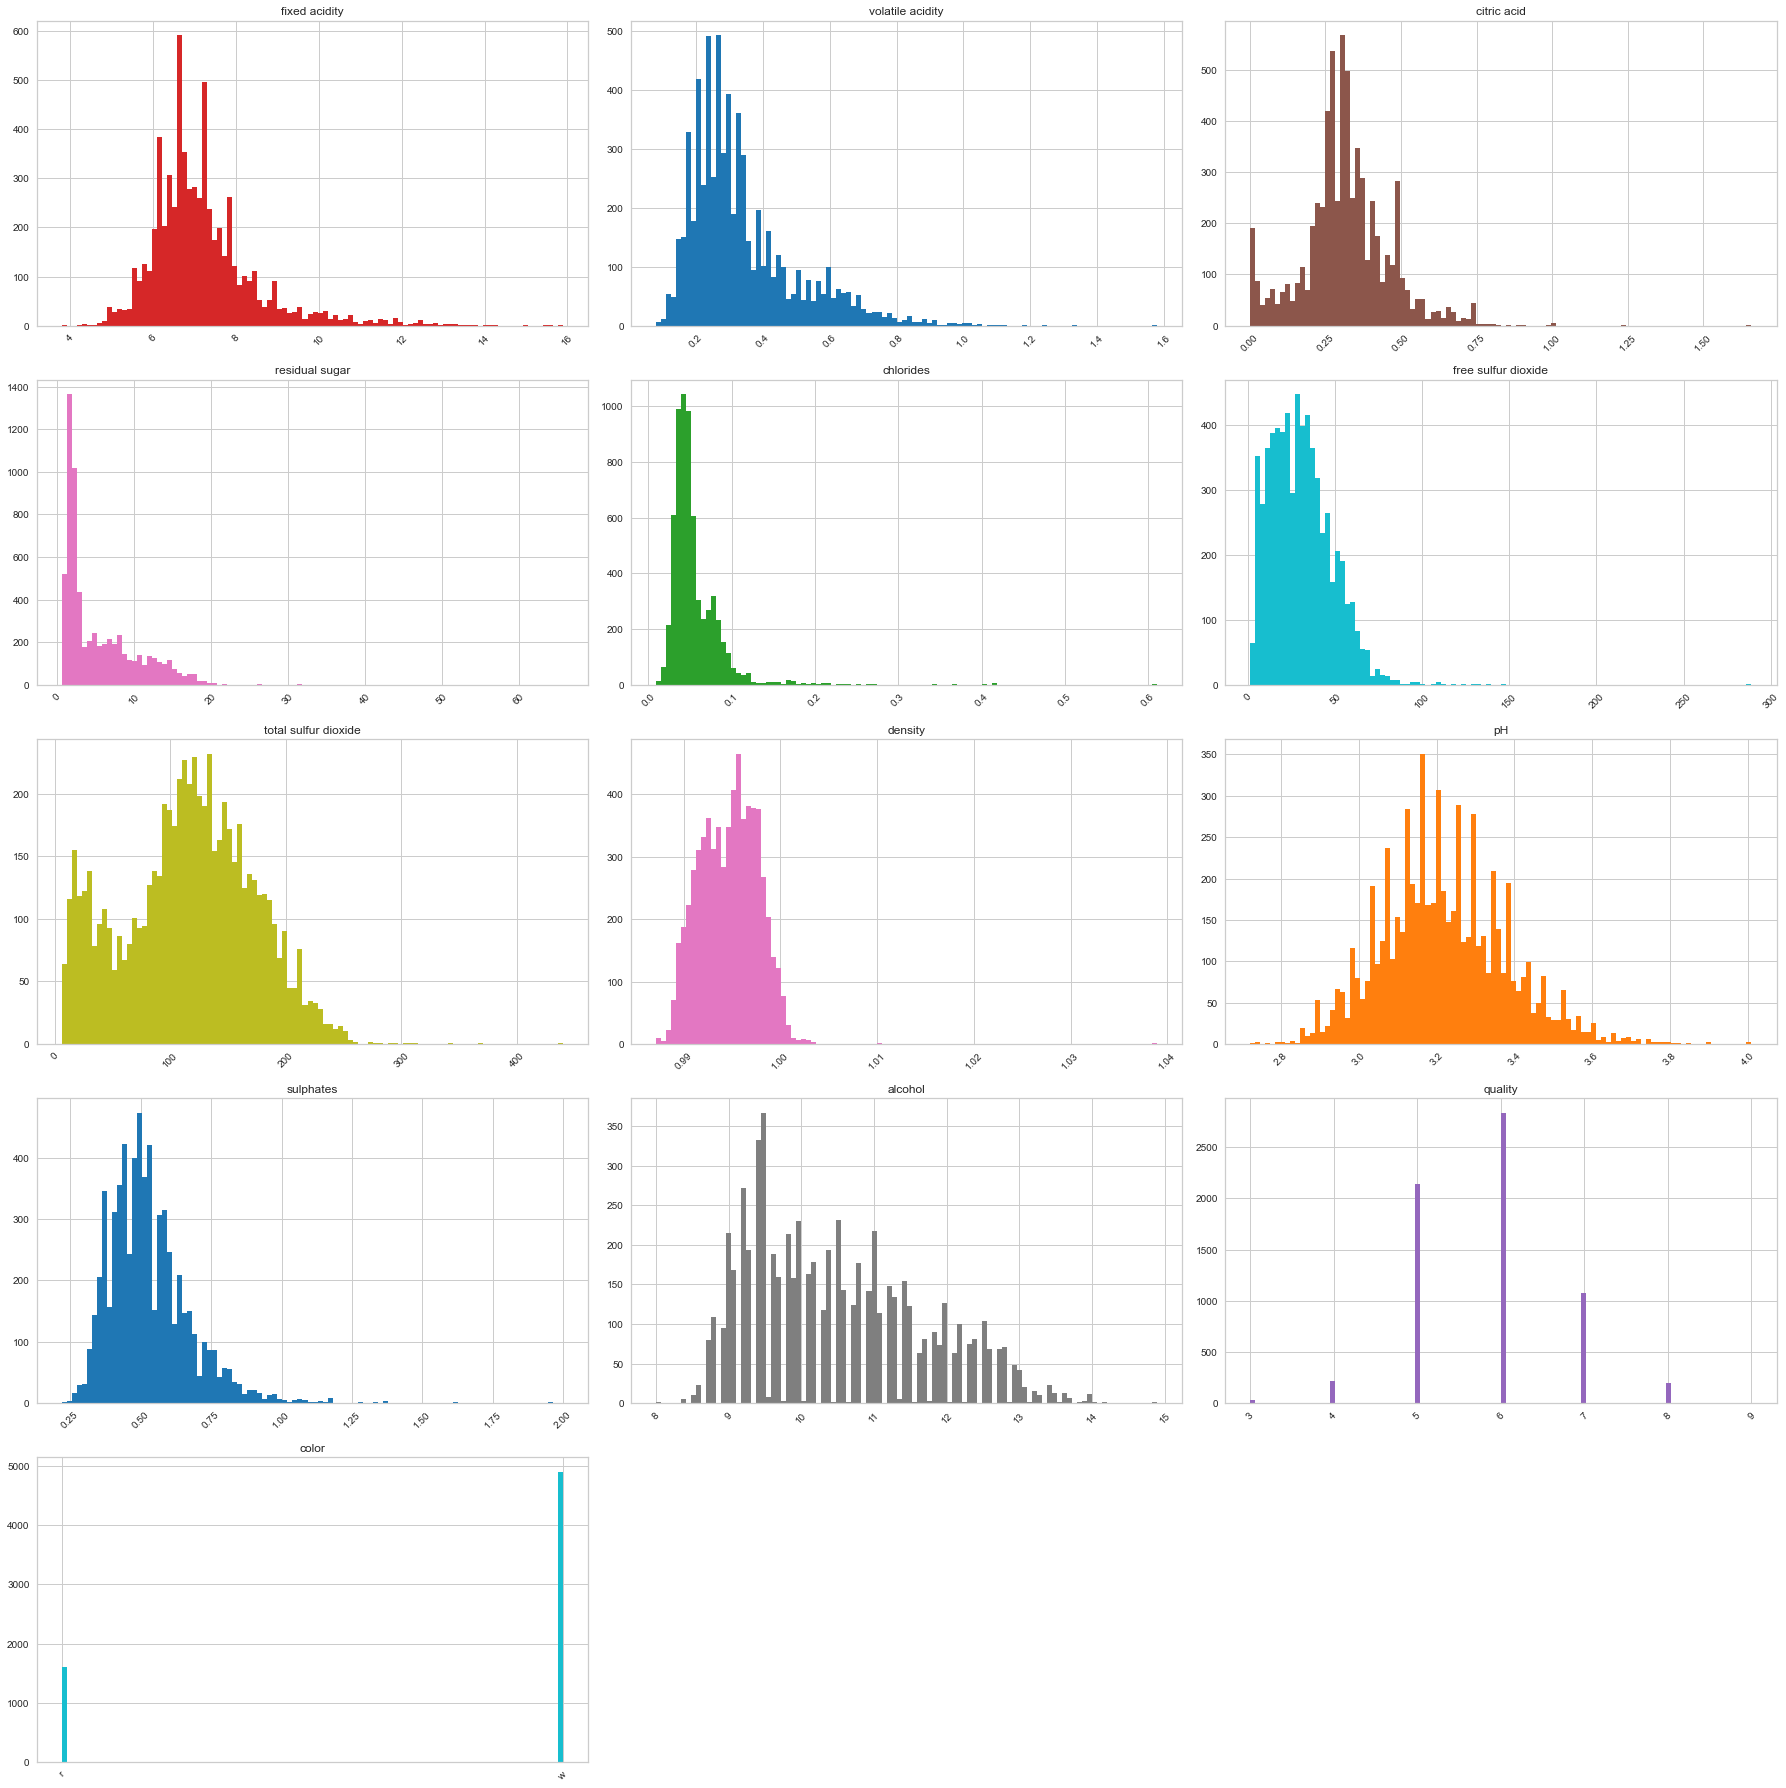

In [17]:
col_len = len(df.columns)
row_num = int(np.ceil(col_len/3))
colors = (
    'tab:blue', 'tab:orange', 'tab:green', 'tab:red',
    'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray',
    'tab:olive', 'tab:cyan'
)

fig, axes = plt.subplots(row_num, 3)


fig.set_size_inches(25, row_num*5)

for num, col in enumerate(df.columns):
    cur_ax = axes[num//3][num%3]
    df[col].hist(ax=cur_ax, xrot=45, color=np.random.choice(colors), bins=100)
    cur_ax.set_title(col)

axes[-1][-1].axis('off')
axes[-1][-2].axis('off')
# plt.suptitle('Feature distributions')
plt.tight_layout()

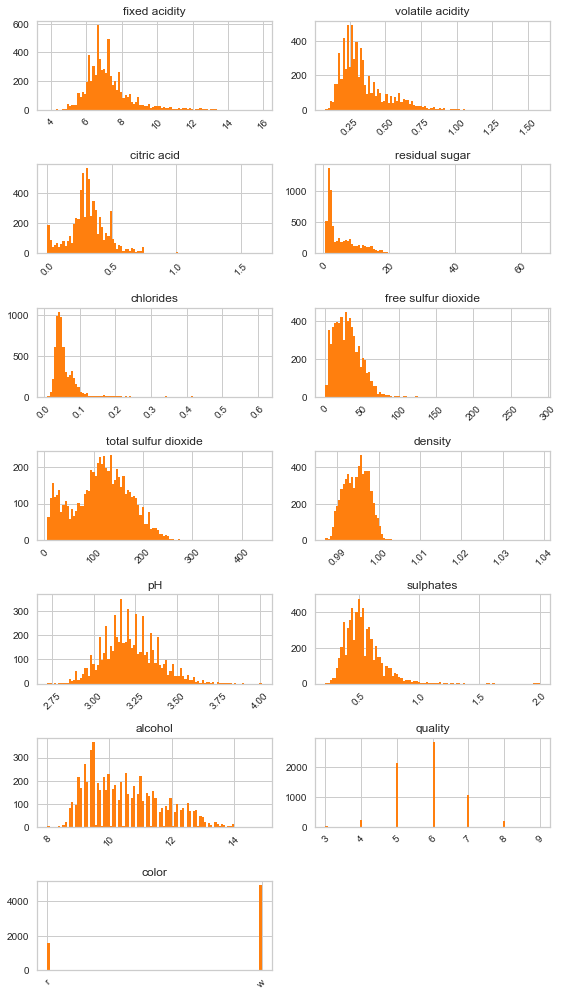

In [33]:
col_len = len(df.columns)
row_num = int(np.ceil(col_len/2))
colors = (
    'tab:blue', 'tab:orange', 'tab:green', 'tab:red',
    'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray',
    'tab:olive', 'tab:cyan'
)

fig, axes = plt.subplots(row_num, 2)


fig.set_size_inches(8, row_num*2)

for num, col in enumerate(df.columns):
    cur_ax = axes[num//2][num%2]
    df[col].hist(ax=cur_ax, xrot=45, color='tab:orange', bins=100)
    cur_ax.set_title(col)

axes[-1][-1].axis('off')
# axes[-1][-2].axis('off')
# plt.suptitle('Feature distributions')
plt.tight_layout()

In [62]:
df.describe(percentiles=[0.01, 0.25, 0.5, 0.75, 0.9, .99])

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_class,color_red,color_white
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378,0.158689,0.246114,0.753886
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255,0.457456,0.430779,0.430779
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000,-1.000000,0.000000,0.000000
1%,5.100000,0.120000,0.000000,0.900000,0.021000,4.000000,11.000000,0.988920,2.890000,0.300000,8.700000,4.000000,-1.000000,0.000000,0.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000,0.000000,0.000000,1.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000,0.000000,0.000000,1.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000,0.000000,0.000000,1.000000
90%,8.800000,0.590000,0.490000,13.000000,0.086000,54.000000,188.000000,0.998400,3.420000,0.720000,12.300000,7.000000,1.000000,1.000000,1.000000
99%,12.000000,0.880000,0.740000,18.200000,0.186160,77.000000,238.000000,1.000600,3.640000,0.990000,13.400000,8.000000,1.000000,1.000000,1.000000


- all features are non-negative
- the distributions are far fron normal ( except pH)  
    It means that we should work with outliers withput using 3 sigma rule
- 

## Short Encoding

In [85]:
df['quality_class'] = df['quality'].apply(lambda x: -1 if x < 5 else 1 if x > 6 else 0)

In [86]:
df['color_red'] = (df['color'] == 'r').astype(np.uint8)
df['color_white'] = (df['color'] == 'w').astype(np.uint8)

In [87]:
df.drop(columns=['color', 'quality'], inplace=True)

In [88]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality_class,color_red,color_white
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0,1,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0,1,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0,1,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0,1,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0,1,0


## Split

In [89]:
train_X, test_X = train_test_split(df, train_size=0.9, random_state=13)

In [90]:
train_X.shape, test_X.shape

((5847, 14), (650, 14))

In [92]:
train_X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality_class,color_red,color_white
1514,6.9,0.84,0.21,4.1,0.074,16.0,65.0,0.99842,3.53,0.72,9.233333,0,1,0
2159,6.3,0.24,0.37,1.8,0.031,6.0,61.0,0.98970,3.30,0.34,12.200000,-1,0,1
2718,5.2,0.28,0.29,1.1,0.028,18.0,69.0,0.99168,3.24,0.54,10.000000,0,0,1
4204,6.9,0.26,0.38,10.5,0.044,33.0,139.0,0.99517,3.06,0.50,10.300000,0,0,1
748,6.9,0.18,0.38,8.1,0.049,44.0,176.0,0.99580,3.30,0.54,9.800000,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
866,6.8,0.49,0.22,2.3,0.071,13.0,24.0,0.99438,3.41,0.83,11.300000,0,1,0
1191,6.9,0.25,0.26,5.2,0.024,36.0,135.0,0.99480,3.16,0.72,10.700000,1,0,1
74,9.7,0.32,0.54,2.5,0.094,28.0,83.0,0.99840,3.28,0.82,9.600000,0,1,0
4721,6.1,0.32,0.33,10.7,0.036,27.0,98.0,0.99521,3.34,0.52,10.200000,0,0,1


## Outliers

Due to the fact that the distribution of the features are not normal we will drop objects that has extreme values of the features (>.99 ) quantile

In [124]:
def cut_quantile(df, q_thresh=.99, qs=None):
    if not qs:
        qs = {x: None for x in df.columns}
        
    df_copy = df.copy()
    
    for f_name, q in qs.items():
        if q:
            print(f'{f_name} found q.')
            df_copy = df_copy[df_copy[f_name] <= q]
        else:
            print(f'{f_name} not found q.')
            qs[f_name] = df_copy[f_name].quantile(q_thresh)
            df_copy = df_copy[df_copy[f_name] <= qs[f_name]]
    return df_copy, qs

In [71]:
df.shape

(6497, 15)

In [125]:
train_X_cutted, train_qs = cut_quantile(train_X)

fixed acidity not found q.
volatile acidity not found q.
citric acid not found q.
residual sugar not found q.
chlorides not found q.
free sulfur dioxide not found q.
total sulfur dioxide not found q.
density not found q.
pH not found q.
sulphates not found q.
alcohol not found q.
quality_class not found q.
color_red not found q.
color_white not found q.


In [126]:
test_X_cutted, _ = cut_quantile(test_X, qs=train_qs)

fixed acidity found q.
volatile acidity found q.
citric acid found q.
residual sugar found q.
chlorides found q.
free sulfur dioxide found q.
total sulfur dioxide found q.
density found q.
pH found q.
sulphates found q.
alcohol found q.
quality_class found q.
color_red found q.
color_white found q.


In [128]:
test_X_cutted.shape, train_X_cutted.shape

((579, 14), (5293, 14))

In [129]:
test_X_cutted['split'] = 'test'
train_X_cutted['split'] = 'train'

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality_class,color_red,color_white
3767,6.9,0.400,0.17,12.9,0.033,59.0,186.0,0.997540,3.08,0.49,9.4,0,0,1
3100,6.7,0.140,0.51,4.3,0.028,57.0,124.0,0.991760,2.91,0.54,10.7,1,0,1
780,6.0,0.395,0.00,1.4,0.042,7.0,55.0,0.991350,3.37,0.38,11.2,-1,0,1
1668,7.9,0.180,0.33,1.2,0.033,20.0,72.0,0.992200,3.12,0.38,10.5,1,0,1
4772,6.4,0.280,0.45,8.6,0.057,47.0,223.0,0.996540,3.16,0.51,9.1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28,7.1,0.710,0.00,1.9,0.080,14.0,35.0,0.997200,3.47,0.55,9.4,0,1,0
4586,5.4,0.290,0.38,1.2,0.029,31.0,132.0,0.988950,3.28,0.36,12.4,0,0,1
4545,6.3,0.250,0.53,1.8,0.021,41.0,101.0,0.989315,3.19,0.31,13.0,0,0,1
4686,6.8,0.630,0.04,1.3,0.058,25.0,133.0,0.992710,3.17,0.39,10.2,-1,0,1


## Normalizing and centering

In [130]:
from sklearn.preprocessing import StandardScaler

In [131]:
scaler = StandardScaler(with_mean=True, with_std=True)

In [132]:
X_train_cutted_scaled = pd.DataFrame(
    scaler.fit_transform(
        train_X_cutted.drop(columns=['quality_class'])),
    columns=train_X_cutted.drop(columns=['quality_class']).columns
)

In [134]:
train_y = train_X_cutted[['quality_class']]

In [136]:
train_y.shape, X_train_cutted_scaled.shape

((5293, 1), (5293, 13))

In [137]:
X_train_cutted_scaled.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,color_red,color_white
count,5.293000e+03,5.293000e+03,5.293000e+03,5.293000e+03,5.293000e+03,5.293000e+03,5.293000e+03,5.293000e+03,5.293000e+03,5.293000e+03,5.293000e+03,5.293000e+03,5.293000e+03
mean,-5.383103e-16,1.315571e-16,-1.033663e-16,-8.859970e-17,-6.980582e-17,4.564227e-17,6.577856e-17,-5.424718e-15,-1.783405e-15,3.953426e-16,-3.960138e-16,-5.772405e-17,-1.476662e-17
std,1.000094e+00,1.000094e+00,1.000094e+00,1.000094e+00,1.000094e+00,1.000094e+00,1.000094e+00,1.000094e+00,1.000094e+00,1.000094e+00,1.000094e+00,1.000094e+00,1.000094e+00
min,-2.619635e+00,-1.657951e+00,-2.319543e+00,-1.057446e+00,-1.749365e+00,-1.800436e+00,-2.030594e+00,-2.429201e+00,-3.262690e+00,-2.387742e+00,-2.161500e+00,-5.449642e-01,-1.834983e+00
25%,-6.640926e-01,-6.687944e-01,-4.705682e-01,-7.857146e-01,-6.785043e-01,-8.058997e-01,-6.531213e-01,-8.207272e-01,-7.034994e-01,-7.098983e-01,-8.716274e-01,-5.449642e-01,5.449642e-01
50%,-1.307630e-01,-2.731316e-01,-2.681416e-02,-5.139835e-01,-2.501601e-01,-5.999769e-02,5.422925e-02,6.645791e-02,-4.729668e-02,-1.506170e-01,-9.770397e-02,-5.449642e-01,5.449642e-01
75%,4.025666e-01,3.863063e-01,4.908989e-01,5.955850e-01,3.923562e-01,6.859044e-01,7.057364e-01,8.093853e-01,6.745263e-01,5.684590e-01,6.762195e-01,-5.449642e-01,5.449642e-01
max,4.313651e+00,3.650524e+00,3.153423e+00,2.905299e+00,5.618155e+00,2.923610e+00,2.213510e+00,2.028363e+00,2.708755e+00,3.364865e+00,2.482041e+00,1.834983e+00,5.449642e-01


In [138]:
X_test_cutted_scaled = pd.DataFrame(
    scaler.transform(
        test_X_cutted.drop(columns=['quality_class'])),
    columns=test_X_cutted.drop(columns=['quality_class']).columns
)

In [139]:
test_y = test_X_cutted[['quality_class']]

In [140]:
test_y.shape, X_test_cutted_scaled.shape

((579, 1), (579, 13))

In [141]:
X_test_cutted_scaled.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,color_red,color_white
count,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000
mean,-0.013781,-0.060209,0.011634,0.025705,-0.032141,0.070224,0.034650,-0.011109,-0.079370,-0.088383,-0.062005,-0.064042,0.064042
std,0.949637,0.977125,1.010890,1.057052,0.971916,1.010402,0.964447,1.015058,0.972765,0.970843,0.956469,0.956485,0.956485
min,-2.886299,-1.526064,-2.319543,-1.034801,-1.535193,-1.676119,-1.993365,-2.357072,-2.737728,-1.988256,-1.645551,-0.544964,-1.834983
25%,-0.664093,-0.734738,-0.470568,-0.808359,-0.635670,-0.681583,-0.532127,-0.889250,-0.769120,-0.789796,-0.871627,-0.544964,0.544964
50%,-0.219651,-0.339075,0.047145,-0.559272,-0.292995,-0.059998,0.054229,0.095309,-0.047297,-0.150617,-0.183695,-0.544964,0.544964
75%,0.491455,0.386306,0.601837,0.629551,0.221018,0.716984,0.761580,0.802172,0.608906,0.488562,0.590228,-0.544964,0.544964
max,4.135874,3.617552,3.153423,2.893977,5.146977,2.674976,2.157667,2.028363,2.708755,3.125174,2.482041,1.834983,0.544964


## Saving

In [143]:
save_path = './data/preprocessed_splits/wine/'
os.makedirs(save_path, exist_ok=True)
for name, df in {
    'X_train': X_train_cutted_scaled,
    'X_test': X_test_cutted_scaled,
    'y_train':train_y,
    'y_test': test_y
}.items():
    df.to_parquet(os.path.join(save_path, f'{name}.snappy.parquet'))

# Bike dataset

In [34]:
df = pd.read_csv('../Project_1/data/Bike-Sharing-Dataset/hour.csv', sep=',')

In [19]:
df

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


In [38]:
df = df.rename(columns={'cnt': 'y'}).drop(columns=['dteday', 'instant', 'casual', 'registered'])

## EDA

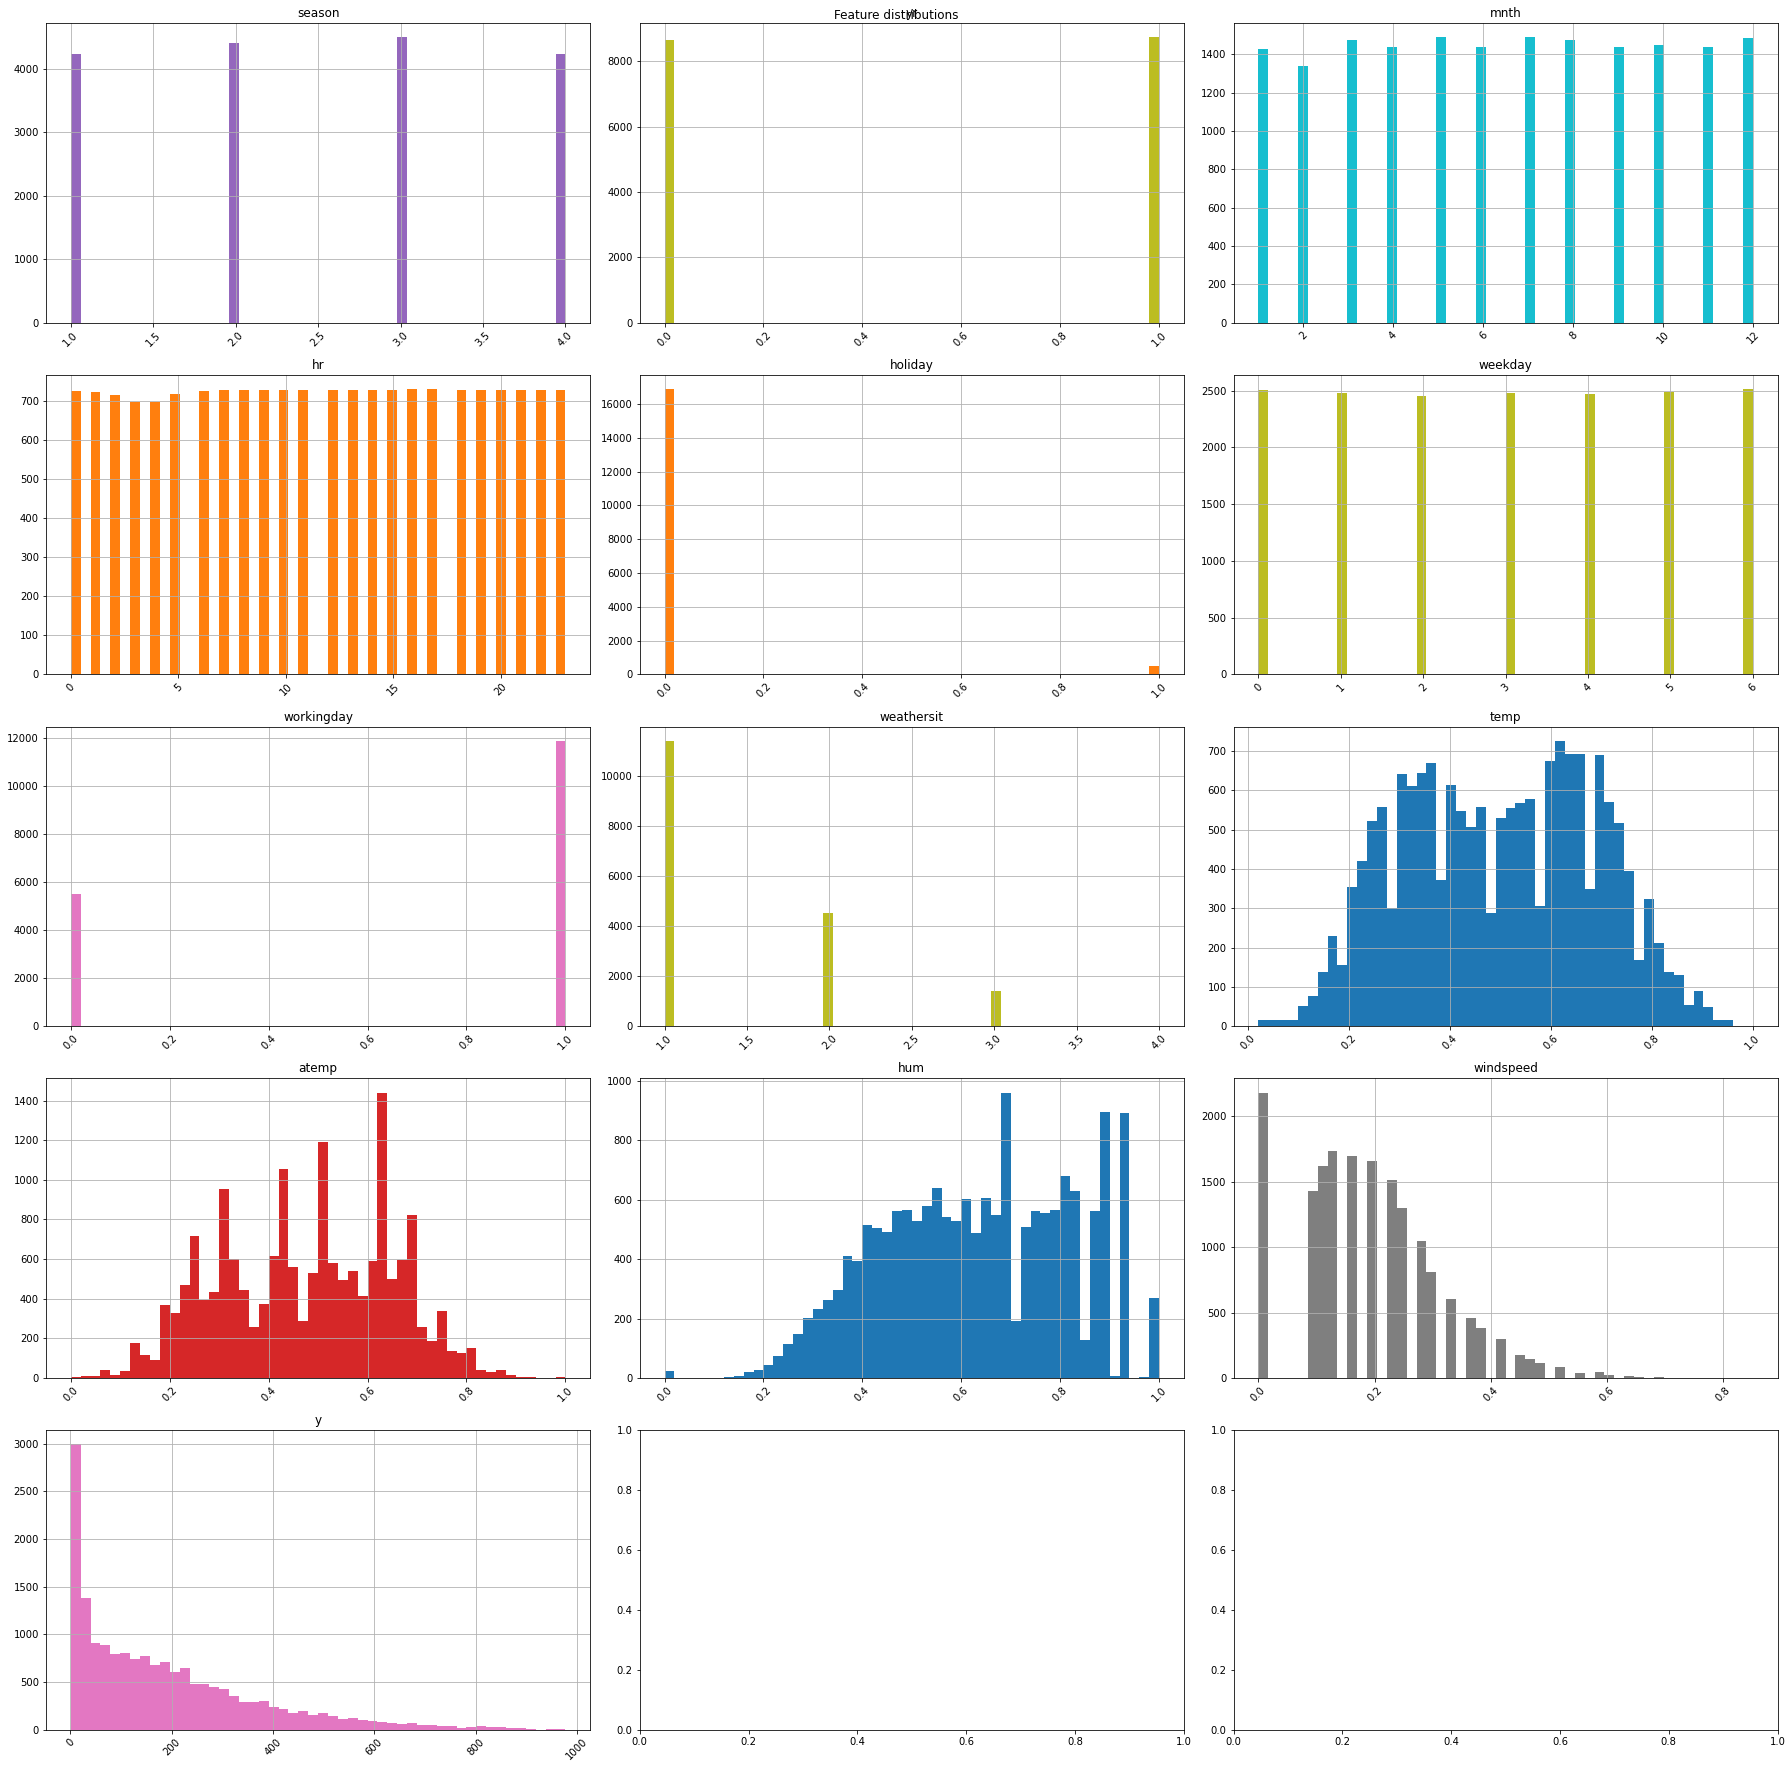

In [151]:
col_len = len(df.columns)
row_num = int(np.ceil(col_len/3))
colors = ('tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan')

fig, axes = plt.subplots(row_num, 3)


fig.set_size_inches(25, row_num*5)

for num, col in enumerate(df.columns):
    cur_ax = axes[num//3][num%3]
    df[col].hist(ax=cur_ax, xrot=45, color=np.random.choice(colors), bins=50)
    cur_ax.set_title(col)
    
plt.suptitle('Feature distributions')
plt.tight_layout()

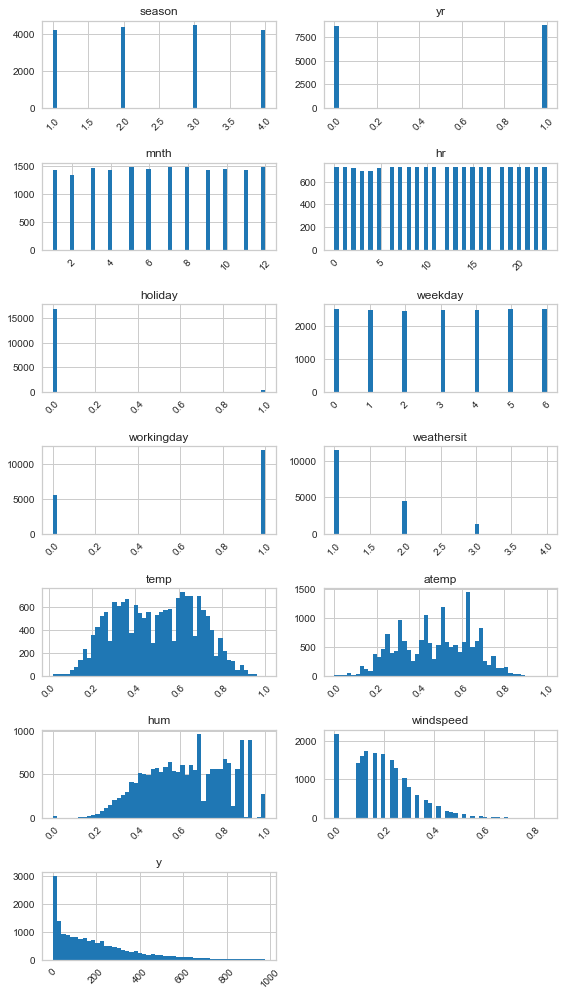

In [40]:
col_len = len(df.columns)
row_num = int(np.ceil(col_len/2))
colors = ('tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan')

fig, axes = plt.subplots(row_num, 2)


fig.set_size_inches(8, row_num*2)

for num, col in enumerate(df.columns):
    cur_ax = axes[num//2][num%2]
    df[col].hist(ax=cur_ax, xrot=45, color='tab:blue', bins=50)
    cur_ax.set_title(col)
    
# plt.suptitle('Feature distributions')
axes[-1][-1].axis('off')
# axes[0][1].set_xticks([])
# axes[-1][-2].axis('off')
plt.tight_layout()

In [ ]:
train_test_split

All the data that goes to the next stage doesn't contains outliers.

## Split

In [152]:
train_X, test_X = train_test_split(df, train_size=0.9, random_state=13)

In [154]:
train_X.shape, test_X.shape

((15641, 13), (1738, 13))

## Normalizing and centering

In [155]:
train_X

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,y
2617,2,0,4,23,0,6,0,2,0.54,0.5152,0.88,0.1642,117
16039,4,1,11,0,0,2,1,1,0.24,0.2576,0.60,0.1045,19
14281,3,1,8,6,0,4,1,2,0.60,0.5455,0.88,0.0896,192
17190,1,1,12,1,0,1,1,1,0.22,0.2727,0.69,0.0000,11
8797,1,1,1,9,0,6,0,1,0.22,0.2273,0.80,0.1343,130
...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,1,0,1,16,0,5,1,2,0.20,0.2121,0.37,0.1642,87
866,1,0,2,13,0,2,1,2,0.24,0.1970,0.32,0.4478,50
74,1,0,1,6,0,2,1,1,0.12,0.1515,0.74,0.1045,36
14512,3,1,9,21,0,6,0,3,0.64,0.5758,0.89,0.0000,104


In [156]:
X_train_scaled = pd.DataFrame(
    scaler.fit_transform(
        train_X.drop(columns=['y'])),
    columns=train_X.drop(columns=['y']).columns
)

In [161]:
y_train = train_X[['y']]

In [159]:
X_train_scaled

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed
0,-0.452865,-1.006221,-0.737853,1.661117,-0.170928,1.494606,-1.463997,0.898915,0.222803,0.227570,1.310651,-0.212835
1,1.353397,0.993817,1.296888,-1.664325,-0.170928,-0.497608,0.683061,-0.665907,-1.336371,-1.271405,-0.140291,-0.700618
2,0.450266,0.993817,0.424856,-0.796818,-0.170928,0.498499,0.683061,0.898915,0.534637,0.403886,1.310651,-0.822359
3,-1.355996,0.993817,1.587566,-1.519740,-0.170928,-0.995661,0.683061,-0.665907,-1.440316,-1.183538,0.326083,-1.554441
4,-1.355996,0.993817,-1.609885,-0.363065,-0.170928,1.494606,-1.463997,-0.665907,-1.440316,-1.447721,0.896096,-0.457135
...,...,...,...,...,...,...,...,...,...,...,...,...
15636,-1.355996,-1.006221,-1.609885,0.649026,-0.170928,0.996553,0.683061,0.898915,-1.544261,-1.536170,-1.332136,-0.212835
15637,-1.355996,-1.006221,-1.319208,0.215273,-0.170928,-0.497608,0.683061,0.898915,-1.336371,-1.624037,-1.591233,2.104336
15638,-1.355996,-1.006221,-1.609885,-0.796818,-0.170928,-0.497608,0.683061,-0.665907,-1.960040,-1.888801,0.585180,-0.700618
15639,0.450266,0.993817,0.715534,1.371948,-0.170928,1.494606,-1.463997,2.463737,0.742527,0.580201,1.362471,-1.554441


In [158]:
X_train_scaled.describe()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed
count,1.564100e+04,1.564100e+04,1.564100e+04,1.564100e+04,1.564100e+04,1.564100e+04,1.564100e+04,1.564100e+04,1.564100e+04,1.564100e+04,1.564100e+04,1.564100e+04
mean,3.952255e-17,7.768225e-17,-1.362846e-17,5.951096e-17,4.633678e-17,3.634257e-17,-5.542242e-17,1.490046e-16,-7.859081e-17,-2.257782e-16,5.225381e-16,7.018659e-17
std,1.000032e+00,1.000032e+00,1.000032e+00,1.000032e+00,1.000032e+00,1.000032e+00,1.000032e+00,1.000032e+00,1.000032e+00,1.000032e+00,1.000032e+00,1.000032e+00
min,-1.355996e+00,-1.006221e+00,-1.609885e+00,-1.664325e+00,-1.709277e-01,-1.493715e+00,-1.463997e+00,-6.659074e-01,-2.479765e+00,-2.770380e+00,-3.249453e+00,-1.554441e+00
25%,-4.528647e-01,-1.006221e+00,-7.378533e-01,-7.968183e-01,-1.709277e-01,-9.956612e-01,-1.463997e+00,-6.659074e-01,-8.166463e-01,-8.309066e-01,-7.621234e-01,-7.006175e-01
50%,4.502664e-01,9.938175e-01,1.341788e-01,7.068840e-02,-1.709277e-01,4.457994e-04,6.830614e-01,-6.659074e-01,1.491288e-02,5.067223e-02,1.516713e-02,3.064756e-02
75%,4.502664e-01,9.938175e-01,1.006211e+00,7.936106e-01,-1.709277e-01,9.965528e-01,6.830614e-01,8.989150e-01,8.464720e-01,8.443841e-01,7.924577e-01,5.184300e-01
max,1.353397e+00,9.938175e-01,1.587566e+00,1.661117e+00,5.850425e+00,1.494606e+00,6.830614e-01,4.028560e+00,2.613535e+00,3.048622e+00,1.932484e+00,5.396254e+00


In [162]:
X_test_scaled = pd.DataFrame(
    scaler.transform(
        test_X.drop(columns=['y'])),
    columns=test_X.drop(columns=['y']).columns
)

In [163]:
y_test = test_X[['y']]

In [164]:
X_test_scaled

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed
0,0.450266,0.993817,0.424856,1.661117,-0.170928,0.000446,0.683061,-0.665907,1.054362,1.109149,0.585180,-1.554441
1,-0.452865,0.993817,-0.737853,-1.375156,-0.170928,0.996553,0.683061,-0.665907,-0.712701,-0.830907,-0.658485,1.616553
2,-0.452865,-1.006221,-0.447176,1.516533,-0.170928,1.494606,-1.463997,2.463737,0.222803,0.227570,1.621568,-0.212835
3,0.450266,0.993817,0.715534,0.070688,-0.170928,-0.995661,0.683061,0.898915,0.638582,0.756517,0.326083,0.030648
4,0.450266,-1.006221,0.715534,0.215273,-0.170928,-1.493715,-1.463997,0.898915,1.470141,1.549647,-0.036652,0.762730
...,...,...,...,...,...,...,...,...,...,...,...,...
1733,-0.452865,0.993817,-0.156499,0.070688,-0.170928,0.498499,0.683061,0.898915,0.846472,0.844384,-0.088472,0.274947
1734,0.450266,-1.006221,0.134179,1.227364,5.850425,-0.995661,-1.463997,0.898915,1.366197,1.285464,-0.399388,-0.700618
1735,1.353397,0.993817,1.296888,-0.941403,-0.170928,0.996553,0.683061,-0.665907,-1.336371,-1.095089,0.947916,-1.554441
1736,-1.355996,-1.006221,-1.319208,-0.218480,-0.170928,0.498499,0.683061,-0.665907,-1.960040,-2.152984,-1.073040,0.884471


In [165]:
X_test_scaled.describe()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed
count,1738.000000,1738.000000,1738.000000,1738.000000,1738.000000,1738.000000,1738.000000,1738.000000,1738.000000,1738.000000,1738.000000,1738.000000
mean,0.001819,-0.010805,-0.001794,0.051555,0.023086,0.022798,0.018437,-0.004144,-0.007455,-0.018436,0.008071,-0.012371
std,0.996914,1.000296,0.995731,0.995948,1.063595,0.989526,0.992889,1.004784,1.007566,0.999815,0.997469,0.995802
min,-1.355996,-1.006221,-1.609885,-1.664325,-0.170928,-1.493715,-1.463997,-0.665907,-2.479765,-2.681931,-3.249453,-1.554441
25%,-0.452865,-1.006221,-0.737853,-0.796818,-0.170928,-0.995661,-1.463997,-0.665907,-0.816646,-0.830907,-0.762123,-0.700618
50%,0.450266,-1.006221,0.134179,0.070688,-0.170928,0.000446,0.683061,-0.665907,0.014913,0.050672,0.066986,0.030648
75%,0.450266,0.993817,0.715534,0.938195,-0.170928,0.996553,0.683061,0.898915,0.846472,0.844384,0.792458,0.518430
max,1.353397,0.993817,1.587566,1.661117,5.850425,1.494606,0.683061,4.028560,2.405645,2.431226,1.932484,5.396254


In [168]:
X_train_scaled.shape, y_train.shape

((15641, 12), (15641, 1))

In [167]:
X_test_scaled.shape, y_test.shape

((1738, 12), (1738, 1))

## Saving

In [169]:
save_path = './data/preprocessed_splits/bike/'
os.makedirs(save_path, exist_ok=True)
for name, df in {
    'X_train': X_train_scaled,
    'X_test': X_test_scaled,
    'y_train': y_train,
    'y_test': y_test
}.items():
    df.to_parquet(os.path.join(save_path, f'{name}.snappy.parquet'))